In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#load data
data_x = np.load('data_x_aumentated_normalized.npy') #images
data_y = np.load('data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  2368


In [6]:
VALIDATION_PERCENTAGE = 0.1

In [7]:
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

validation_x = data_x[:validation_size] #taking validation images from original data
validation_y = data_y[:validation_size]
data_x = data_x[validation_size:] #removing validation images from original data
data_y = data_y[validation_size:]

# **Splitting data in train - validation - test**

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [10]:
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [12]:
adam = tf.keras.optimizers.Adam(lr=0.001)

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
def define_model():
    K.set_image_data_format('channels_last')
    K.set_learning_phase(1)
    model = tf.keras.applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
        pooling=None,
        classes=NUM_CLASSES,
        # classifier_activation="softmax",
        # **kwargs
    )
    new_model = models.Sequential()
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #new_model.add(tf.keras.layers.l2( l=0.01))
    #new_model.add(layers.GlobalAveragePooling2D())
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
    new_model.add(tf.keras.layers.Activation('softmax'))
    return new_model

In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
epochs = 100
num_classes = 2
num_kfold=1

all_models = []

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
45/45 - 25s - loss: 1.8297 - accuracy: 0.5799 - val_loss: 22.2994 - val_accuracy: 0.2419 - 25s/epoch - 567ms/step
Epoch 2/100
45/45 - 14s - loss: 1.1926 - accuracy: 0.8008 - val_loss: 3.2410 - val_accuracy: 0.2391 - 14s/epoch - 313ms/step
Epoch 3/100
45/45 - 14s - loss: 0.9308 - accuracy: 0.8663 - val_loss: 2.8844 - val_accuracy: 0.2391 - 14s/epoch - 313ms/step
Epoch 4/100
45/45 - 14s - loss: 0.8028 - accuracy: 0.8888 - val_loss: 2.2122 - val_accuracy: 0.2729 - 14s/epoch - 313ms/step
Epoch 5/100
45/45 - 14s - loss: 0.5695 - accuracy: 0.9402 - val_loss: 2.6558 - val_accuracy: 0.2729 - 14s/epoch - 313ms/step
Epoch 6/100
45/45 - 14s - loss: 0.5192 - accuracy: 0.9296 - val_loss: 3.0206 - val_accuracy: 0.2391 - 14s/epoch - 314ms/step
Epoch 7/100
45/45 - 14s - loss: 0.3968 - accuracy: 0.9514 - val_loss: 5.1235 - val_accuracy: 0.2729 - 14s/epoch - 314ms/step
Epoch 8/100
45/45 - 14s - loss: 0.3508 - accuracy: 0.9437 - val_loss: 2.1042 - val_accuracy: 0.2729 - 14s/epoch - 314ms/step

Epoch 66/100
45/45 - 14s - loss: 5.0862e-04 - accuracy: 1.0000 - val_loss: 0.1807 - val_accuracy: 0.9550 - 14s/epoch - 317ms/step
Epoch 67/100
45/45 - 14s - loss: 4.9371e-04 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9522 - 14s/epoch - 316ms/step
Epoch 68/100
45/45 - 14s - loss: 4.9917e-04 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9550 - 14s/epoch - 317ms/step
Epoch 69/100
45/45 - 14s - loss: 4.6897e-04 - accuracy: 1.0000 - val_loss: 0.1809 - val_accuracy: 0.9550 - 14s/epoch - 316ms/step
Epoch 70/100
45/45 - 14s - loss: 4.6898e-04 - accuracy: 1.0000 - val_loss: 0.1788 - val_accuracy: 0.9536 - 14s/epoch - 316ms/step
Epoch 71/100
45/45 - 14s - loss: 4.7562e-04 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9550 - 14s/epoch - 316ms/step
Epoch 72/100
45/45 - 14s - loss: 4.4774e-04 - accuracy: 1.0000 - val_loss: 0.1843 - val_accuracy: 0.9536 - 14s/epoch - 317ms/step
Epoch 73/100
45/45 - 14s - loss: 4.6547e-04 - accuracy: 1.0000 - val_loss: 0.1877 - val_ac

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_1.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_1.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
45/45 - 21s - loss: 2.0087 - accuracy: 0.2871 - val_loss: 305267296.0000 - val_accuracy: 0.2532 - 21s/epoch - 461ms/step
Epoch 2/100
45/45 - 14s - loss: 1.6377 - accuracy: 0.2526 - val_loss: 748446.3125 - val_accuracy: 0.2447 - 14s/epoch - 315ms/step
Epoch 3/100
45/45 - 14s - loss: 1.5267 - accuracy: 0.2533 - val_loss: 7417.8047 - val_accuracy: 0.2447 - 14s/epoch - 314ms/step
Epoch 4/100
45/45 - 14s - loss: 1.4690 - accuracy: 0.2773 - val_loss: 151.3677 - val_accuracy: 0.2532 - 14s/epoch - 315ms/step
Epoch 5/100
45/45 - 14s - loss: 1.4221 - accuracy: 0.2695 - val_loss: 1.4284 - val_accuracy: 0.2518 - 14s/epoch - 314ms/step
Epoch 6/100
45/45 - 14s - loss: 1.3740 - accuracy: 0.3195 - val_loss: 1.4253 - val_accuracy: 0.2518 - 14s/epoch - 314ms/step
Epoch 7/100
45/45 - 14s - loss: 1.3524 - accuracy: 0.3744 - val_loss: 1.4220 - val_accuracy: 0.2504 - 14s/epoch - 315ms/step
Epoch 8/100
45/45 - 14s - loss: 1.1788 - accuracy: 0.4926 - val_loss: 1.4209 - val_accuracy: 0.2940 - 14s/e

Epoch 66/100
45/45 - 14s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4141 - val_accuracy: 0.9001 - 14s/epoch - 316ms/step
Epoch 67/100
45/45 - 14s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4254 - val_accuracy: 0.8945 - 14s/epoch - 317ms/step
Epoch 68/100
45/45 - 14s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4329 - val_accuracy: 0.8945 - 14s/epoch - 318ms/step
Epoch 69/100
45/45 - 14s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4564 - val_accuracy: 0.8889 - 14s/epoch - 317ms/step
Epoch 70/100
45/45 - 14s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4555 - val_accuracy: 0.8875 - 14s/epoch - 317ms/step
Epoch 71/100
45/45 - 14s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4473 - val_accuracy: 0.8917 - 14s/epoch - 317ms/step
Epoch 72/100
45/45 - 14s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4359 - val_accuracy: 0.8973 - 14s/epoch - 316ms/step
Epoch 73/100
45/45 - 14s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4182 - val_accuracy: 0.9015 - 14s/epoch - 317

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_2.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_2.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
45/45 - 23s - loss: 2.0628 - accuracy: 0.2764 - val_loss: 105437143040.0000 - val_accuracy: 0.2563 - 23s/epoch - 506ms/step
Epoch 2/100
45/45 - 14s - loss: 1.6546 - accuracy: 0.2693 - val_loss: 14109.0342 - val_accuracy: 0.2408 - 14s/epoch - 314ms/step
Epoch 3/100
45/45 - 14s - loss: 1.5215 - accuracy: 0.2883 - val_loss: 2.3825 - val_accuracy: 0.2408 - 14s/epoch - 315ms/step
Epoch 4/100
45/45 - 14s - loss: 1.4393 - accuracy: 0.3474 - val_loss: 1.4837 - val_accuracy: 0.2507 - 14s/epoch - 315ms/step
Epoch 5/100
45/45 - 14s - loss: 1.2867 - accuracy: 0.3959 - val_loss: 1.5251 - val_accuracy: 0.2507 - 14s/epoch - 314ms/step
Epoch 6/100
45/45 - 14s - loss: 1.1588 - accuracy: 0.4627 - val_loss: 1.6438 - val_accuracy: 0.2507 - 14s/epoch - 315ms/step
Epoch 7/100
45/45 - 14s - loss: 1.0401 - accuracy: 0.5225 - val_loss: 1.8512 - val_accuracy: 0.2507 - 14s/epoch - 315ms/step
Epoch 8/100
45/45 - 14s - loss: 0.9237 - accuracy: 0.5865 - val_loss: 2.0019 - val_accuracy: 0.2507 - 14s/epoc

Epoch 66/100
45/45 - 14s - loss: 0.0509 - accuracy: 0.9852 - val_loss: 3.6372 - val_accuracy: 0.5338 - 14s/epoch - 317ms/step
Epoch 67/100
45/45 - 14s - loss: 0.0632 - accuracy: 0.9789 - val_loss: 8.1471 - val_accuracy: 0.4648 - 14s/epoch - 318ms/step
Epoch 68/100
45/45 - 14s - loss: 0.0276 - accuracy: 0.9930 - val_loss: 0.8229 - val_accuracy: 0.8296 - 14s/epoch - 317ms/step
Epoch 69/100
45/45 - 14s - loss: 0.0778 - accuracy: 0.9810 - val_loss: 2.7378 - val_accuracy: 0.5549 - 14s/epoch - 318ms/step
Epoch 70/100
45/45 - 14s - loss: 0.0615 - accuracy: 0.9852 - val_loss: 2.6790 - val_accuracy: 0.5831 - 14s/epoch - 318ms/step
Epoch 71/100
45/45 - 14s - loss: 0.0278 - accuracy: 0.9958 - val_loss: 1.3703 - val_accuracy: 0.7789 - 14s/epoch - 317ms/step
Epoch 72/100
45/45 - 14s - loss: 0.0214 - accuracy: 0.9951 - val_loss: 2.7176 - val_accuracy: 0.6127 - 14s/epoch - 317ms/step
Epoch 73/100
45/45 - 14s - loss: 0.0168 - accuracy: 0.9972 - val_loss: 1.7945 - val_accuracy: 0.7380 - 14s/epoch - 317

INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_3.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_augmented_kfold_3.npy\assets


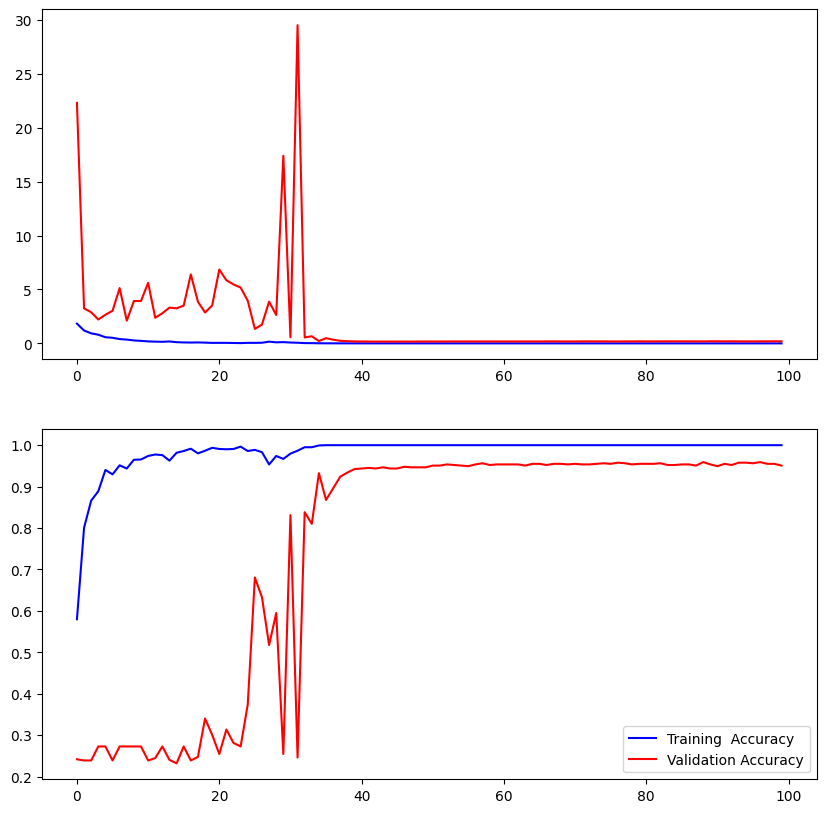

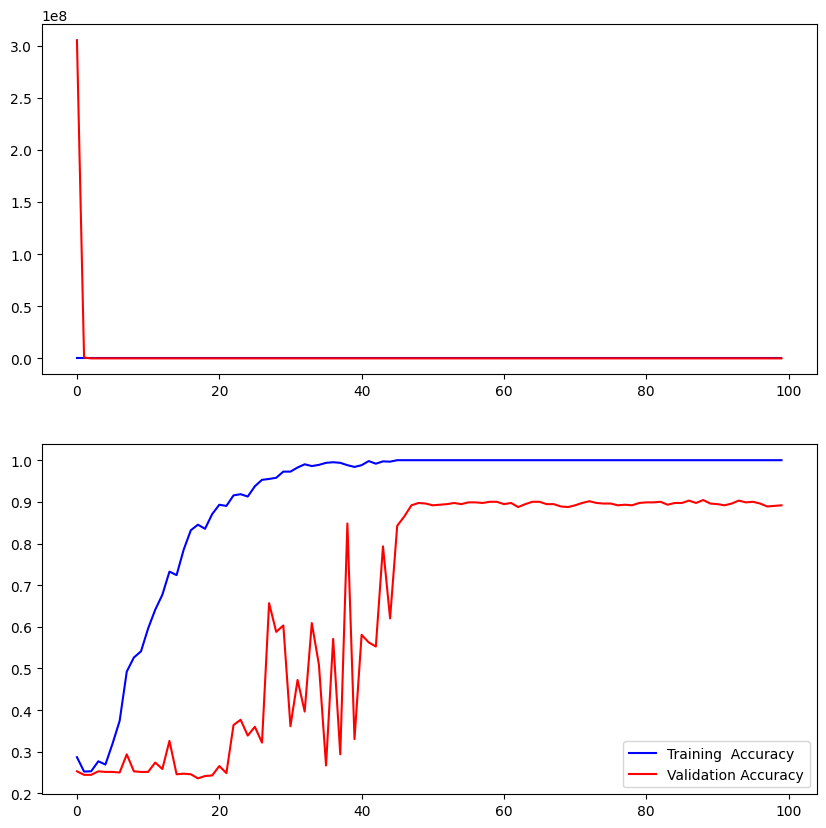

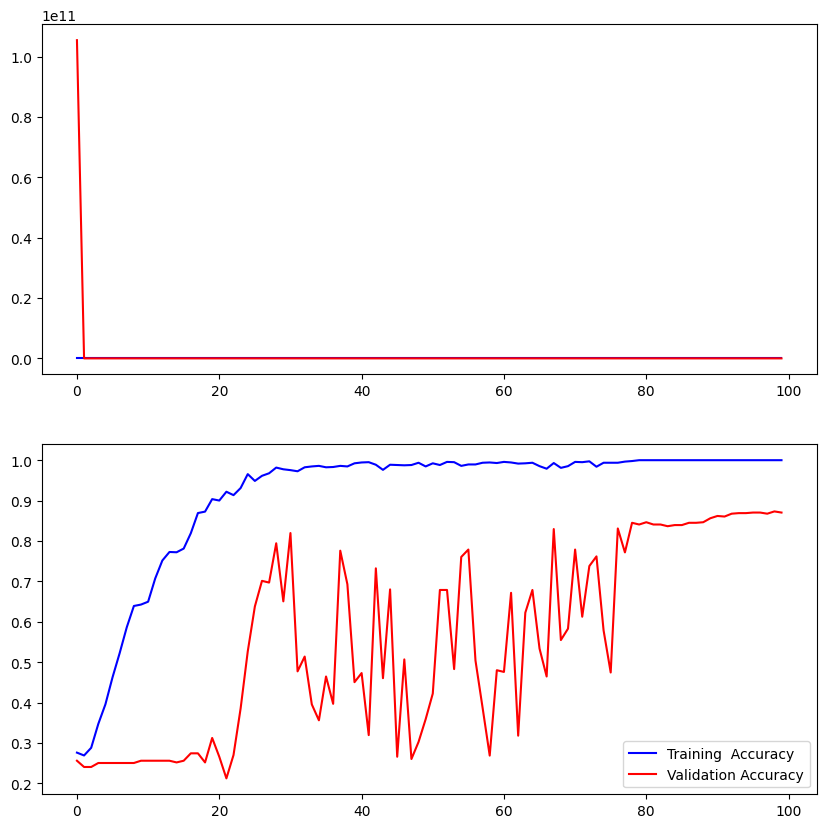

In [15]:
for train, test in kfold.split (data_x, data_y):
    new_model = define_model()

    new_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    history = new_model.fit(data_x[train], data_y[train],
                                epochs=epochs,verbose=2,validation_data=(data_x[test], data_y[test]), shuffle=False)

    new_model.history.history.keys()
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(new_model.history.history['loss'],color='b',label='Training Loss')
    ax[0].plot(new_model.history.history['val_loss'],color='r',label='Validation Loss')

    #Plotting the training accuracy and validation accuracy
    ax[1].plot(new_model.history.history['accuracy'],color='b',label='Training  Accuracy')
    ax[1].plot(new_model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

    plt.legend()
    print('Accuracy Score = ',np.max(history.history['val_accuracy']))

    scores = new_model.evaluate(validation_x,validation_y,verbose=0)
    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
    
    new_model.save(f'resnet50_100epochs_augmented_kfold_{str(num_kfold)}.npy')
    all_models.append(new_model)
    num_kfold = num_kfold + 1

In [16]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))

90.96% (+/- 1.78%)


**Random forest - flatting**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
cvscores_rf = []
for new_model in all_models:
    new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
    featureVector = new_model_rf.predict(data_x)
    featureVector2 = new_model_rf.predict(validation_x)
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(featureVector,data_y)
    y_pred=clf.predict(featureVector2)
    score = metrics.accuracy_score(validation_y, y_pred)
    cvscores_rf.append(score)
    print("Accuracy:",score)

8/8 [==============================] - 1s 75ms/step
Accuracy: 0.9194915254237288


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores_rf),np.std(cvscores_rf)))

# **Testes**

In [ ]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [ ]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

In [ ]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
cm = confusion_matrix(test_y, pred_probs)

In [ ]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)